# Analisis Global 2
* Ya me comenzaba a estresar ver tantas lineas (obvio no fui muy limpio, intentare corregirlo).
* Esta parte se corresponde a lo visto en el reporte del usuario de Kaggle **lmorgan95** a la parte 2.5.2 en adelante.
* A lo largo de las secciones anteriores he ido replicando sus estadisticos en Python(al ser mi primer proyecto es muy interesante para mi el como se aborda). 
* A partir del apartado 3 me enfocare totalmente en México y Latinoamerica, haciendo mis propias preguntas.

In [1]:
#Importamos librerias necesarias basicas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
df = pd.read_csv("masterClean.csv")
df.head(1)

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,EU


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df["continent"] = df["continent"].fillna("NA")
df.head(1) #Necesito revisar como evitar la creacion de esas columnas y que Norte America se cambie a Nan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,EU


In [4]:
df.drop(df[df["country"] == "Macau"].index, inplace=True)

## Tendencia lineal 
En esta parte del reporte el interes es saber como cambia la tasa de suicidio a largo del tiempo dentro de cada pais. En lugar de visualizar las tasas de los 93 paises a lo largo del tiempo, se ajusta una regresion lineal
a los datos de cada pais. Se buscan los paises cuya tasa aumenta o disminuye linealmente a lo largo del tiempo.
lm(suicides_per_100k ~year) suicidios en termino del año

In [5]:
countries = df["country"].unique().tolist()
len(countries)

93

In [6]:
df_Tendencia = df[["country","year","suicides_no","population"]]

In [7]:
df_groupT = df_Tendencia.groupby(["country","year"])

In [ ]:

for name,groups in df_groupT:
    print(name)
    print(groups)
#sklearn.metrics.classification_report


In [8]:
population_T = df_groupT["population"].sum()
population_T

country     year
Albania     1987     2709600
            1988     2764300
            1989     2803100
            1992     2822500
            1993     2807300
                      ...   
Uzbekistan  2010    25651783
            2011    25978049
            2012    26381830
            2013    26838924
            2014    27313507
Name: population, Length: 2306, dtype: int64

In [9]:
suicides_T = df_groupT["suicides_no"].sum()

In [10]:
#pd.options.display.max_rows = 50
suicides_per_100k = (suicides_T/population_T)*100000
suicides_per_100k

country     year
Albania     1987    2.694125
            1988    2.279058
            1989    2.425886
            1992    1.665190
            1993    2.600363
                      ...   
Uzbekistan  2010    5.707206
            2011    6.313022
            2012    6.955545
            2013    7.265567
            2014    7.670198
Length: 2306, dtype: float64

In [11]:
#Como no entiendo muy bien lo que quiere hacer en R hare un DataSet con el valor de suicides_per_100k por año
#Extraigo los valores de los paises con sus respectivos suicide ratio por año, los separare y despues los pondre en un nuevo
#DataFrame para que sea usado con la formula suicide_per_100k~año
total = []
paiscuenta = []
size = []
for i in range(0,len(countries)):
    
    pais = suicides_per_100k[countries[i]].to_dict() #Convierto el objeto Serie a un diccionario
    lista = list(pais.items())#Extraigo los elementos del diccionario (año,suicide_100k)
    total.append(lista)#Lista final
    paiscuenta.append(countries[i])#Lista de los paises para comprobar que se usaron todos
    size.append(len(pais))#Extraigo el tamaño de cada pais para separarlos despues en dos columnas (año,pais)
#total

In [12]:
total[0][21]

(2010, 3.5087398689704954)

In [13]:
#list(zip(countries,size))

len(paiscuenta) == len(countries),len(size)#

(True, 93)

In [14]:
#Separar variables.
year = []
suicide_100k = []
paises_total = []
for i in range(0,93):
    for j in range(size[i]):
        year.append(total[i][j][0])
        suicide_100k.append(total[i][j][1])
        paises_total.append(countries[i])
        

In [15]:
len(year) == len(suicide_100k) == len(paises_total)

True

In [16]:
#Creamos el nuevo DF 
df_trend = pd.DataFrame(list(zip(paises_total,year,suicide_100k)), columns=["pais","año","suicides_per_100k"])

In [17]:
df_trend

,pais,año,suicides_per_100k
0,Albania,1987,2.694125
1,Albania,1988,2.279058
2,Albania,1989,2.425886
3,Albania,1992,1.665190
4,Albania,1993,2.600363
...,...,...,...
2301,Uzbekistan,2010,5.707206
2302,Uzbekistan,2011,6.313022
2303,Uzbekistan,2012,6.955545
2304,Uzbekistan,2013,7.265567


In [18]:
#De https://stackoverflow.com/questions/41511945/python-pandas-linear-regression-groupby  encontre un
#codigo para hacer un modelo de regresion lineal para datos agrupados. Lo modificare un poco
def model(df):
    X = df_trend["año"].values.reshape(-1,1)
    Y = df_trend["suicides_per_100k"].values.reshape(-1,1)
    return np.squeeze(LinearRegression().fit(X, Y).predict(X))

#La unica desventaja es que no podremos obtener el summary de los modelos

In [19]:
df_trend.groupby("pais").apply(model)

pais
Albania                 [12.041184645778046, 12.023450047745285, 12.00...
Antigua and Barbuda     [12.041184645778046, 12.023450047745285, 12.00...
Argentina               [12.041184645778046, 12.023450047745285, 12.00...
Armenia                 [12.041184645778046, 12.023450047745285, 12.00...
Aruba                   [12.041184645778046, 12.023450047745285, 12.00...
                                              ...                        
United Arab Emirates    [12.041184645778046, 12.023450047745285, 12.00...
United Kingdom          [12.041184645778046, 12.023450047745285, 12.00...
United States           [12.041184645778046, 12.023450047745285, 12.00...
Uruguay                 [12.041184645778046, 12.023450047745285, 12.00...
Uzbekistan              [12.041184645778046, 12.023450047745285, 12.00...
Length: 93, dtype: object

In [20]:
df_trend1 = df_trend.groupby("pais")

In [21]:
#En lugar de eso se hara un modelo con statsmodels
pvalues = []
parametros = []
for k, g in df_trend1:
    model = ols('suicides_per_100k ~ año', g)
    results = model.fit()
    #print(k)
    #print(results.summary())
    pvalues.append(results.pvalues)
    parametros.append(results.params)

In [22]:
pvalues1 = []

for i in range(0,93):
    pvalues1.append(pvalues[i][1])

In [23]:
p_adjusted = multipletests(pvalues1, method='bonferroni')

In [24]:
p_adjusted1 = list(p_adjusted)

In [25]:
p_adjusted2= []
for i in range(0,93):
    p_adjusted2.append(p_adjusted1[1][i])

In [26]:
p_adjustedFinal = []
indice = []
for i in range(0,93):
    if p_adjusted2[i] < 0.05:
        p_adjustedFinal.append(p_adjusted2[i])
        indice.append(p_adjusted2.index(p_adjusted2[i]))

In [27]:
countries_adj = []
for i in indice:
    countries_adj.append(countries[i])

In [28]:
ajustado_pais = list(zip(p_adjustedFinal,countries_adj))
ajustado_pais

[(5.3082631607541405e-17, 'Austria'),
 (0.0022916413957529613, 'Barbados'),
 (0.00034221976855777883, 'Belgium'),
 (2.93296553176587e-18, 'Brazil'),
 (2.8224199864728482e-06, 'Bulgaria'),
 (5.9457752733814076e-09, 'Canada'),
 (1.043553863114577e-08, 'Chile'),
 (0.012281890488326633, 'Colombia'),
 (0.026953296577777588, 'Costa Rica'),
 (0.00010837861893731703, 'Croatia'),
 (1.3558077659541683e-06, 'Cuba'),
 (0.0003695376509679721, 'Cyprus'),
 (1.7668629187926465e-05, 'Czech Republic'),
 (1.150964352999043e-06, 'Denmark'),
 (0.02217949284363354, 'Ecuador'),
 (0.011811194614015377, 'El Salvador'),
 (6.23961620943921e-08, 'Estonia'),
 (1.3735382469572262e-17, 'Finland'),
 (6.186448032733091e-16, 'France'),
 (3.1116527683378715e-08, 'Germany'),
 (8.959875434011182e-05, 'Guyana'),
 (2.0704441052668383e-15, 'Hungary'),
 (0.019911346297530153, 'Ireland'),
 (0.000355534030708335, 'Israel'),
 (3.2923285690060194e-06, 'Italy'),
 (2.041767733781053e-08, 'Kyrgyzstan'),
 (1.5164635703968384e-08, 'La

<AxesSubplot:>

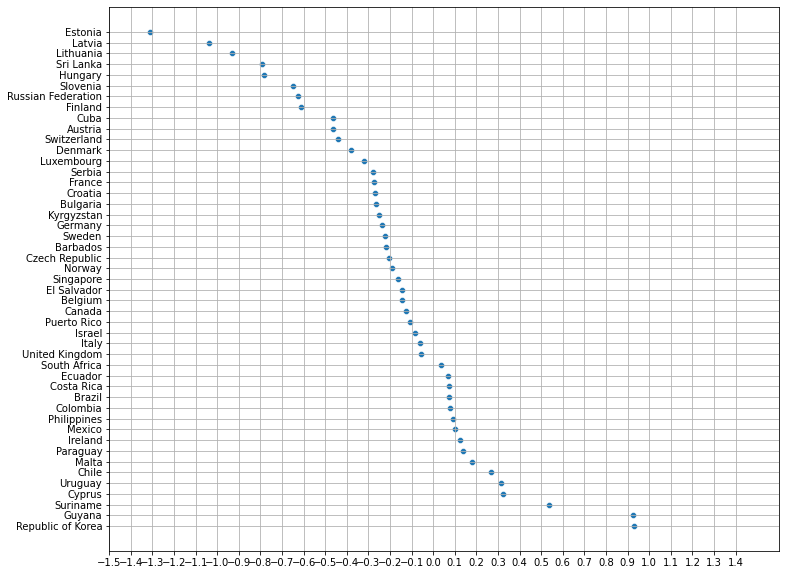

In [35]:
plt.figure(figsize=(12,10))
plt.xlim(-1.5, 1.6)
plt.xticks(np.arange(-1.5,1.5,0.1))
plt.grid(True)
sns.scatterplot(x = par_adj, y =countries1) #YA quedo alv 

In [29]:
parametros_adj = []
for i in indice:
    parametros_adj.append(parametros[i][1])

In [30]:
#Para ordenar la lista y guardar indices de esa lista a ordenar
size= len(parametros_adj)
indice1 = [i for i in range(0,size)]
zipped = list(zip(indice1,parametros_adj))
sorted_list = sorted(zipped,key=lambda x: x[1] )
zipped

[(0, -0.46445784498589787),
 (1, -0.21970226314851643),
 (2, -0.14323465056394136),
 (3, 0.07503460036992741),
 (4, -0.26571282027021736),
 (5, -0.12548824658053653),
 (6, 0.26834602058687385),
 (7, 0.07976438193984482),
 (8, 0.07115165245940441),
 (9, -0.27028306688383164),
 (10, -0.4646154239587466),
 (11, 0.32161896018889713),
 (12, -0.20323295977032935),
 (13, -0.38217237855930447),
 (14, 0.06724775186370947),
 (15, -0.145182530576631),
 (16, -1.3088739145950525),
 (17, -0.6103963197850975),
 (18, -0.27240362767562387),
 (19, -0.23500508759202327),
 (20, 0.9250727820493486),
 (21, -0.7836610888285943),
 (22, 0.12252196698139331),
 (23, -0.08489968300672274),
 (24, -0.06174931859994624),
 (25, -0.24870485689334126),
 (26, -1.037742277083053),
 (27, -0.9336513155372084),
 (28, -0.3219799343627857),
 (29, 0.18124685128341927),
 (30, 0.10298648085545387),
 (31, -0.18858230976517043),
 (32, 0.13596898472258392),
 (33, 0.09228265779465251),
 (34, -0.10831524639561531),
 (35, 0.9305792917

In [31]:
#Se obtienen los indices de la lista ya ordenada
unziped = list(zip(*sorted_list))
index = str(unziped[0])
index

'(16, 26, 27, 41, 21, 39, 36, 17, 10, 0, 44, 13, 28, 37, 18, 9, 4, 25, 19, 43, 1, 12, 31, 38, 15, 2, 5, 34, 23, 24, 45, 40, 14, 8, 3, 7, 33, 30, 22, 32, 29, 6, 46, 11, 42, 20, 35)'

In [32]:
#Se quita el molesto ( )
index1 = index.replace("("," ")
index1 = index1.replace(")"," ")
index1 = index1.split(",")
index1 = [int(i) for i in index1]
len(index1)

47

In [33]:
#se crea nueva lista ordenada 
countries1=[]
for i in index1:
    countries1.append(countries_adj[i])

len(countries1)

47

In [34]:
#Lista ordenada
par_adj = []
for i in index1:
    par_adj.append(parametros_adj[i])
len(par_adj)

47